In [84]:
# Pymaceuticals Inc.

### Analysis
Data Loading and Merging:

The code imports the pandas library and loads two datasets: mouse_metadata and study_results.
It then merges these datasets based on the common column "Mouse ID", creating a new DataFrame called merge_data. This step is crucial for combining information about each mouse with their corresponding study results.
Number of Unique Mice IDs:

The code calculates the number of unique mice IDs present in the merged dataset using the nunique() function on the "Mouse ID" column.
This step provides insight into the total number of unique mice involved in the study.
Identification of Duplicate Time Points:

The code checks for duplicate rows based on both "Mouse ID" and "Timepoint" columns in the merged dataset.
If there are duplicates, it identifies the duplicate mouse ID and displays the associated data.
This is important for quality control purposes, as duplicate entries might indicate errors or inconsistencies in the data collection process.
Creation of Cleaned DataFrame:

The code creates a new DataFrame called cleaned_data by filtering out rows associated with the identified duplicate mouse ID.
Removing duplicates ensures the integrity of the dataset and prevents potential biases or inaccuracies in subsequent analyses.
Updated Number of Unique Mice IDs:

Finally, the code recalculates the number of unique mice IDs in the cleaned dataset.
This step confirms that the duplicate entries have been successfully removed from the dataset.
Overall, this analysis workflow demonstrates essential data preparation steps, including data loading, merging, quality checking, and cleaning. Ensuring data integrity and consistency is crucial for conducting reliable analyses and drawing accurate conclusions from the dataset.
 

SyntaxError: invalid syntax (2943191248.py, line 2)

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


# Display the data table for preview


In [ ]:
import pandas as pd
import os

In [ ]:
mouse_metadata = pd.read_csv("data\Mouse_metadata.csv")
study_results = pd.read_csv("data\Study_results.csv")

In [ ]:
# Checking the number of mice.
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
num_unique_mice = merge_data["Mouse ID"].nunique()
print("Number of unique mice IDs:", num_unique_mice)

Number of unique mice IDs: 249


In [86]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merge_data[merge_data.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
if len(duplicate_mouse_ids) > 0:
    print("Mouse ID(s) with duplicate time points:", duplicate_mouse_ids)
    print("Data associated with duplicate time points:")
    print(merge_data[merge_data["Mouse ID"].isin(duplicate_mouse_ids)])

Mouse ID(s) with duplicate time points: ['g989']
Data associated with duplicate time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          

In [87]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merge_data[merge_data['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [88]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merge_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleaned_data = merge_data.copy()
print("No duplicate mouse IDs with duplicate time points found.")


No duplicate mouse IDs with duplicate time points found.


In [ ]:
# Checking the number of mice in the clean DataFrame.
updated_num_unique_mice = cleaned_data["Mouse ID"].nunique()
print("Number of unique mice IDs in the clean DataFrame:", updated_num_unique_mice)

Number of unique mice IDs in the clean DataFrame: 249


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_table = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats_table = summary_stats_table.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Variance of Tumor Volume',
    'std': 'Standard Deviation of Tumor Volume',
    'sem': 'SEM of Tumor Volume'})

print("Summary Statistics of Tumor Volume for Each Regimen:")
print(summary_stats_table)

Summary Statistics of Tumor Volume for Each Regimen:
              Mean Tumor Volume  Median Tumor Volume  \
Drug Regimen                                           
Capomulin             40.675741            41.557809   
Ceftamin              52.591172            51.776157   
Infubinol             52.884795            51.820584   
Ketapril              55.235638            53.698743   
Naftisol              54.331565            52.509285   
Placebo               54.033581            52.288934   
Propriva              52.322552            50.854632   
Ramicane              40.216745            40.673236   
Stelasyn              54.233149            52.431737   
Zoniferol             53.236507            51.818479   

              Variance of Tumor Volume  Standard Deviation of Tumor Volume  \
Drug Regimen                                                                 
Capomulin                    24.947764                            4.994774   
Ceftamin                     39.290177  

In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats_table = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Variance of Tumor Volume', 'std': 'Standard Deviation of Tumor Volume', 'sem': 'SEM of Tumor Volume'})
# Using the aggregation method, produce the same summary statistics in a single line
print("Summary Statistics of Tumor Volume for Each Regimen:")
print(summary_stats_table)

Summary Statistics of Tumor Volume for Each Regimen:
              Mean Tumor Volume  Median Tumor Volume  \
Drug Regimen                                           
Capomulin             40.675741            41.557809   
Ceftamin              52.591172            51.776157   
Infubinol             52.884795            51.820584   
Ketapril              55.235638            53.698743   
Naftisol              54.331565            52.509285   
Placebo               54.033581            52.288934   
Propriva              52.322552            50.854632   
Ramicane              40.216745            40.673236   
Stelasyn              54.233149            52.431737   
Zoniferol             53.236507            51.818479   

              Variance of Tumor Volume  Standard Deviation of Tumor Volume  \
Drug Regimen                                                                 
Capomulin                    24.947764                            4.994774   
Ceftamin                     39.290177  

## Bar and Pie Charts

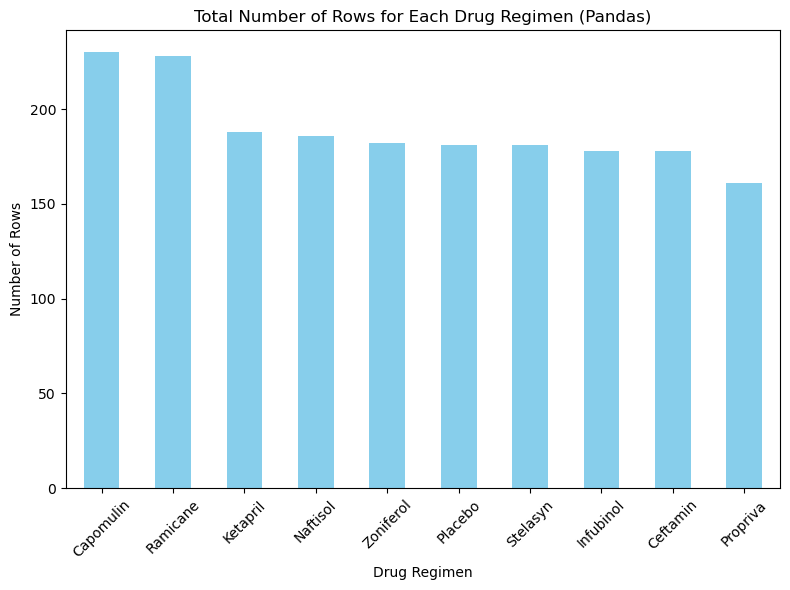

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot_pandas = cleaned_data['Drug Regimen'].value_counts().plot(kind='bar', color='skyblue', figsize=(8, 6))
bar_plot_pandas.set_title('Total Number of Rows for Each Drug Regimen (Pandas)')
bar_plot_pandas.set_xlabel('Drug Regimen')
bar_plot_pandas.set_ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

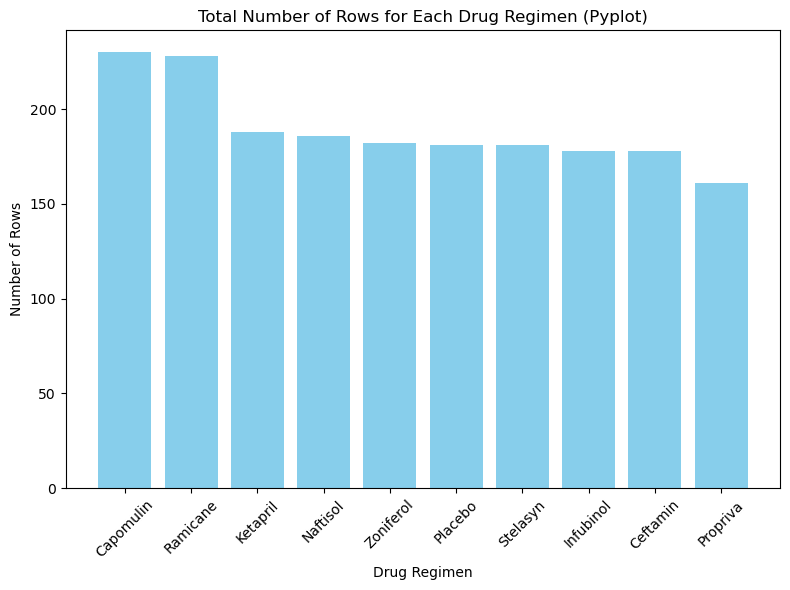

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue')
plt.title('Total Number of Rows for Each Drug Regimen (Pyplot)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

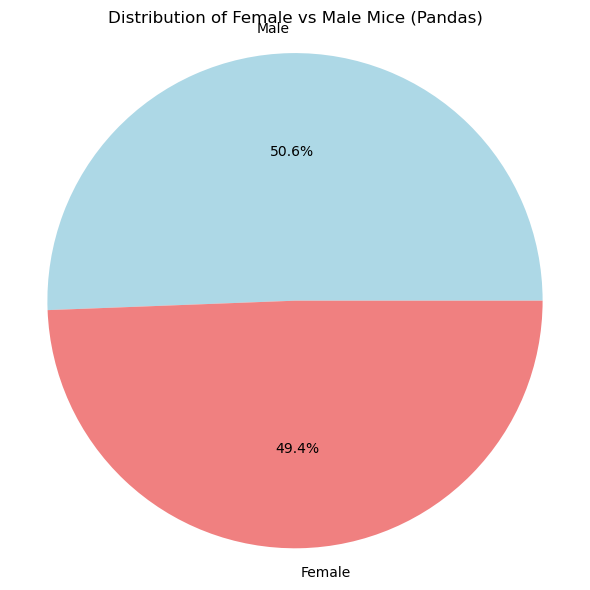

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot_pandas = cleaned_data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], figsize=(6, 6))
pie_plot_pandas.set_title('Distribution of Female vs Male Mice (Pandas)')
pie_plot_pandas.set_ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

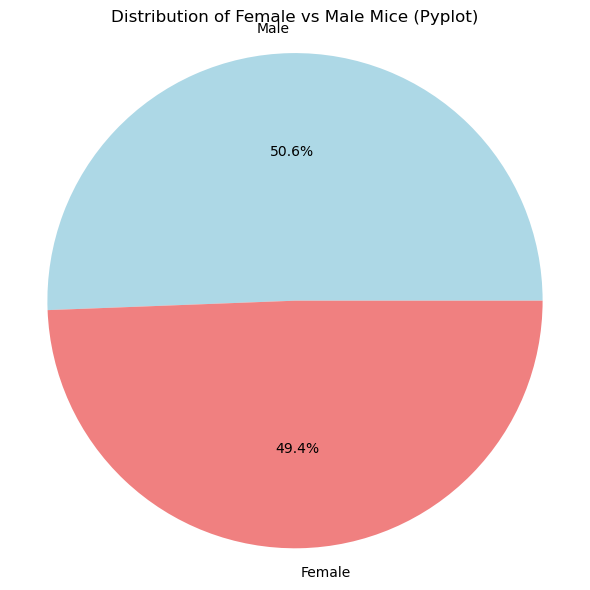

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = cleaned_data['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Female vs Male Mice (Pyplot)')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens_data = cleaned_data[cleaned_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = four_regimens_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']]
print("Final tumor volume of each mouse across four treatment regimens:")
print(final_tumor_volume.head())

Final tumor volume of each mouse across four treatment regimens:
  Mouse ID  Timepoint Drug Regimen  Tumor Volume (mm3)
0     a203         45    Infubinol           67.973419
1     a251         45    Infubinol           65.525743
2     a275         45     Ceftamin           62.999356
3     a411         45     Ramicane           38.407618
4     a444         45     Ramicane           43.047543


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes_by_regimen = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in treatments:
    tumor_volumes_by_regimen[regimen] = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
for regimen, volumes in tumor_volumes_by_regimen.items():
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    print(f"Potential outliers for {regimen}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_per_treatment = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # add subset 
    tumor_volume_data.append(tumor_volume_per_treatment)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume_per_treatment.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume_per_treatment.loc[(tumor_volume_per_treatment < lower_bound) | (tumor_volume_per_treatment > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


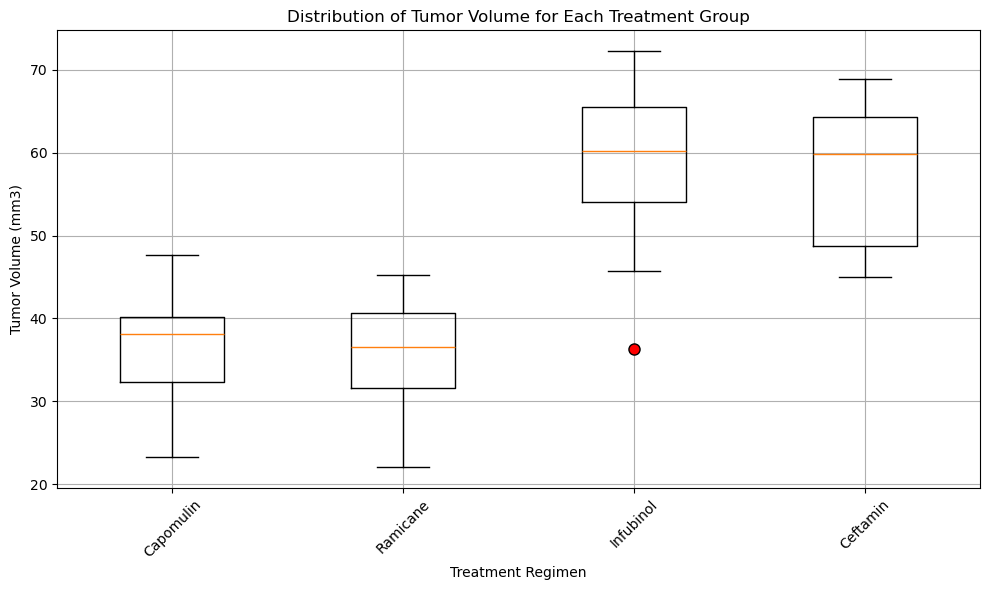

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot([tumor_volumes_by_regimen['Capomulin'], tumor_volumes_by_regimen['Ramicane'], tumor_volumes_by_regimen['Infubinol'], tumor_volumes_by_regimen['Ceftamin']], 
            labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

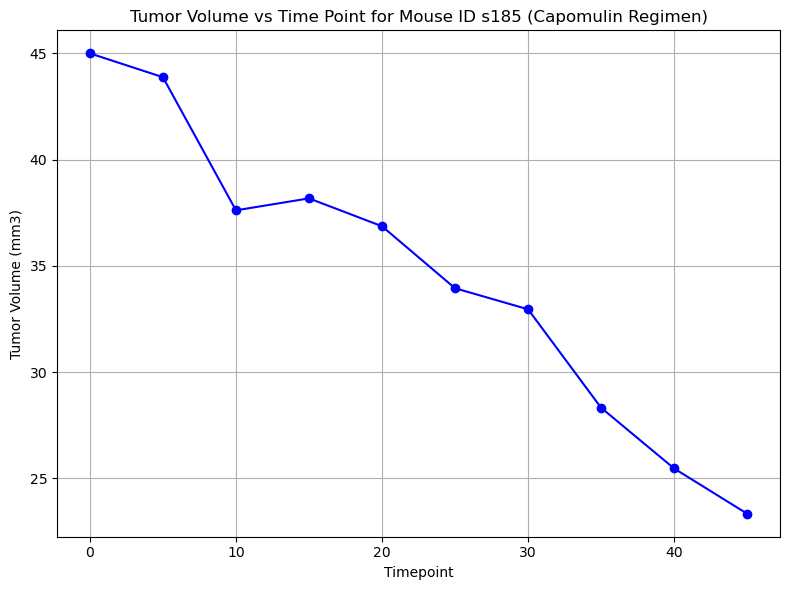

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = cleaned_data[cleaned_data['Mouse ID'] == 's185']

plt.figure(figsize=(8, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.title('Tumor Volume vs Time Point for Mouse ID s185 (Capomulin Regimen)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.tight_layout()
plt.show()

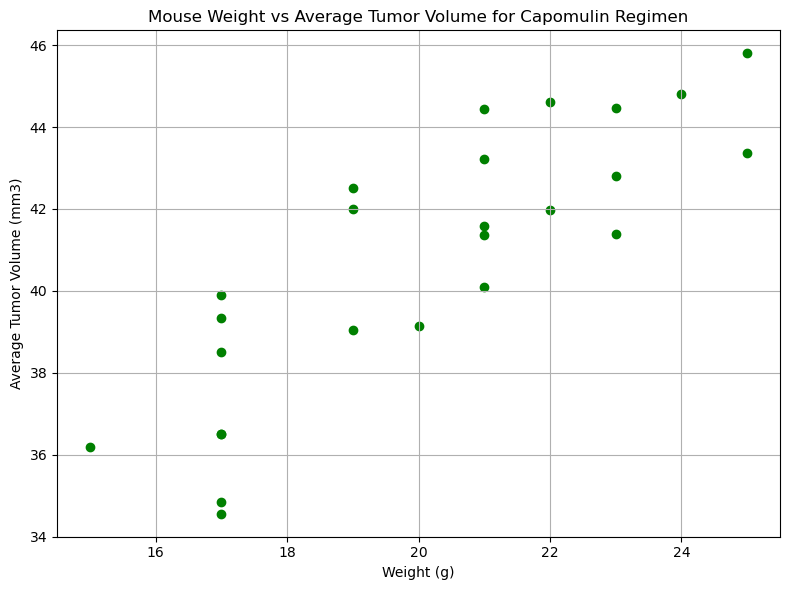

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume_capomulin = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight_capomulin = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='green')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.8419363424694722
Linear regression model:
Slope: 0.9544396890241048
Intercept: 21.552160532685008
R-squared value: 0.7088568047708723


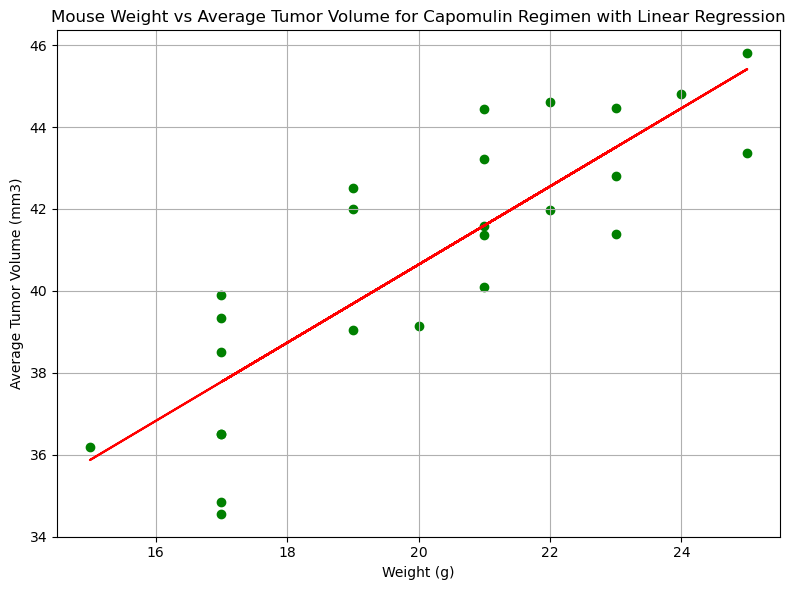

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = avg_weight_capomulin.corr(avg_tumor_volume_capomulin)
print("Correlation coefficient between mouse weight and average tumor volume:", correlation_coefficient)

from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(avg_weight_capomulin, avg_tumor_volume_capomulin)
print("Linear regression model:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared value:", rvalue ** 2)

plt.figure(figsize=(8, 6))
plt.scatter(avg_weight_capomulin, avg_tumor_volume_capomulin, color='green')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen with Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

regress_values = avg_weight_capomulin * slope + intercept
plt.plot(avg_weight_capomulin, regress_values, color='red')
plt.tight_layout()
plt.show()